<a href="https://colab.research.google.com/github/jbaik414/Diabetes_classifier/blob/main/classifier_diab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction Model**

## **Objective:**
The goal of this project is to build a machine learning classifier that predicts whether an individual has diabetes (or is prediabetic) based on health-related risk behaviors, chronic conditions, and lifestyle indicators from the CDC's 2015 Behavioral Risk Factor Surveillance System (BRFSS) survey.

This project focuses on:

- Performing exploratory data analysis (EDA) to understand patterns in the dataset.

- Building and evaluating classification models to predict diabetes risk.

- Identifying key features that contribute to diabetes prediction.



# **Original Data Description**

| Feature     | Type    | Description |
|-------------|---------|-------------|
| **AGE**     | Numeric | Age of the patient in years|
| **CHOL**    | Float   | Total cholesterol level in the blood (mg/dL)|
| **FRAME**   | Categorical (encoded) | Body frame size (e.g., small, medium, large)|
| **GENDER**  | Categorical (encoded) | Gender of the patient|
| **GLYHB**   | Float   | Glycosylated Hemoglobin (HbA1c) percentage. This is a key marker for long-term blood sugar levels and is used to diagnose diabetes (≥6.5% = diabetic). |
| **HDL**     | Float   | High-Density Lipoprotein (HDL) cholesterol level (mg/dL)
| **HEIGHT**  | Float   | Patient height in inches|
| **HIP**     | Float   | Hip circumference in inches|
| **LOCATION**| Categorical (encoded) | Encoded geographic or clinical site of the patient|
| **RATIO**   | Float   | Cholesterol ratio (Total cholesterol / HDL)|
| **WAIST**   | Float   | Waist circumference inches|
| **WEIGHT**  | Float   | Patient weight in pounds|
| **bp.1d**   | Float   | First diastolic blood pressure reading (mmHg)|
| **bp.1s**   | Float   | First systolic blood pressure reading (mmHg)|
| **bp.2d**   | Float   | Second diastolic blood pressure reading (mmHg)|
| **bp.2s**   | Float   | Second systolic blood pressure reading (mmHg)|
| **stab.glu**| Numeric | Stabilized fasting blood glucose level (mg/dL)|
| **time.ppn**| Float   | Time after eating in minutes. Blood glucose levels vary after eating; time since last meal helps interpret readings. |


# **Import Libraries**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# **Load Dataset**

In [33]:
df = pd.read_csv('cleaned_diabetes_data.csv')



# **Note:**
### This dataset has been cleaned beforehand by me and uploaded to a snowflake database. The code for this will be in the Github repository

### Cleaning the dataset consisted of:
- Dropped bp.2d and bp.2s due to majority of the entries were null
- For the Gender column Males are a 1 entry while Females are 0 entries
- For the Frame column they are mapped as small: 0, medium: 1, and large: 2
- For Location column, people from Buckingham are represented by a 0 while people Louisa are represented by a 1
- The ID column is dropped due to its lack of significance in our data analysis
- Added BMI column with formula (patient's weight*703)/(patient's height squared)
-Added Age group column numericalluy encoded such that young: 1, Adult: 2, Elderly: 3


# **Initial Data Exploration**

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CHOL,402.0,207.845771,44.445557,78.000000,179.000000,204.000000,230.000000,443.000000
stab.glu,403.0,106.672457,53.076655,48.000000,81.000000,89.000000,106.000000,385.000000
HDL,402.0,50.445274,17.262626,12.000000,38.000000,46.000000,59.000000,120.000000
RATIO,402.0,4.521642,1.727886,1.500000,3.200000,4.200000,5.400000,19.299999
GLYHB,390.0,5.589769,2.242595,2.680000,4.380000,4.840000,5.600000,16.110001
LOCATION,403.0,0.503722,0.500608,0.000000,0.000000,1.000000,1.000000,1.000000
AGE,403.0,46.851117,16.312333,19.000000,34.000000,45.000000,60.000000,92.000000
GENDER,403.0,0.419355,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000
HEIGHT,398.0,66.020101,3.918515,52.000000,63.000000,66.000000,69.000000,76.000000
WEIGHT,402.0,177.592040,40.340666,99.000000,151.000000,172.500000,200.000000,325.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CHOL       402 non-null    float64
 1   stab.glu   403 non-null    int64  
 2   HDL        402 non-null    float64
 3   RATIO      402 non-null    float64
 4   GLYHB      390 non-null    float64
 5   LOCATION   403 non-null    int64  
 6   AGE        403 non-null    int64  
 7   GENDER     403 non-null    int64  
 8   HEIGHT     398 non-null    float64
 9   WEIGHT     402 non-null    float64
 10  FRAME      391 non-null    float64
 11  bp.1s      398 non-null    float64
 12  bp.1d      398 non-null    float64
 13  WAIST      401 non-null    float64
 14  HIP        401 non-null    float64
 15  time.ppn   400 non-null    float64
 16  BMI        397 non-null    float64
 17  AGE_GROUP  403 non-null    int64  
dtypes: float64(13), int64(5)
memory usage: 56.8 KB


# **Exploratory Data Analysis**

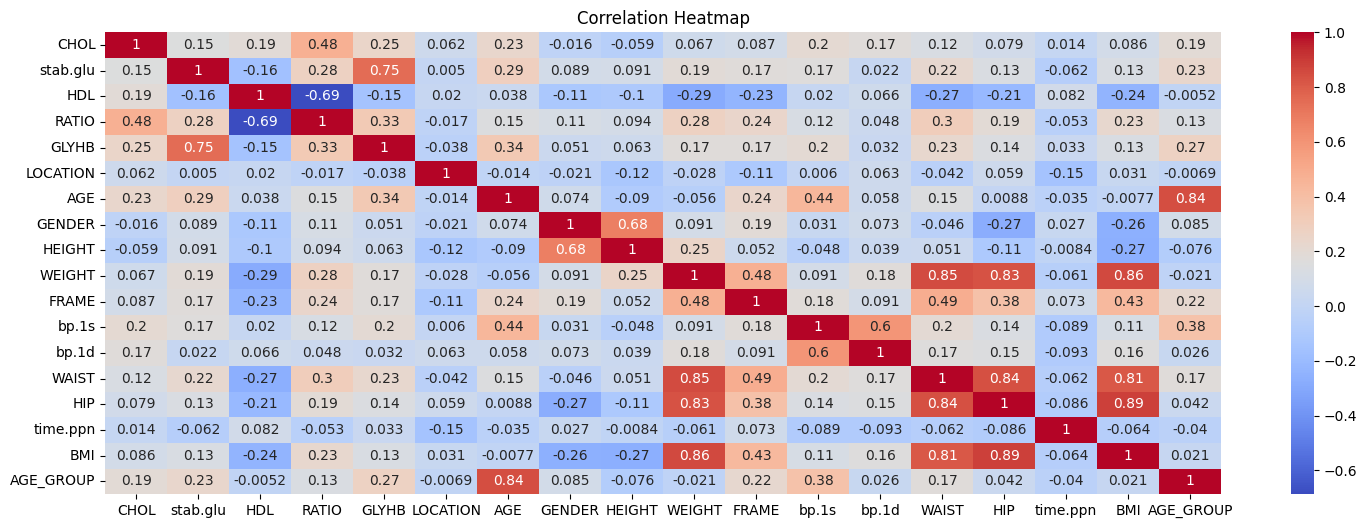

In [36]:
plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

# **Notice:**
### Although numerous correlations are observed, our primary focus is on the features most strongly correlated with hemoglobin levels (glyhb), given their relevance to diabetes classification.




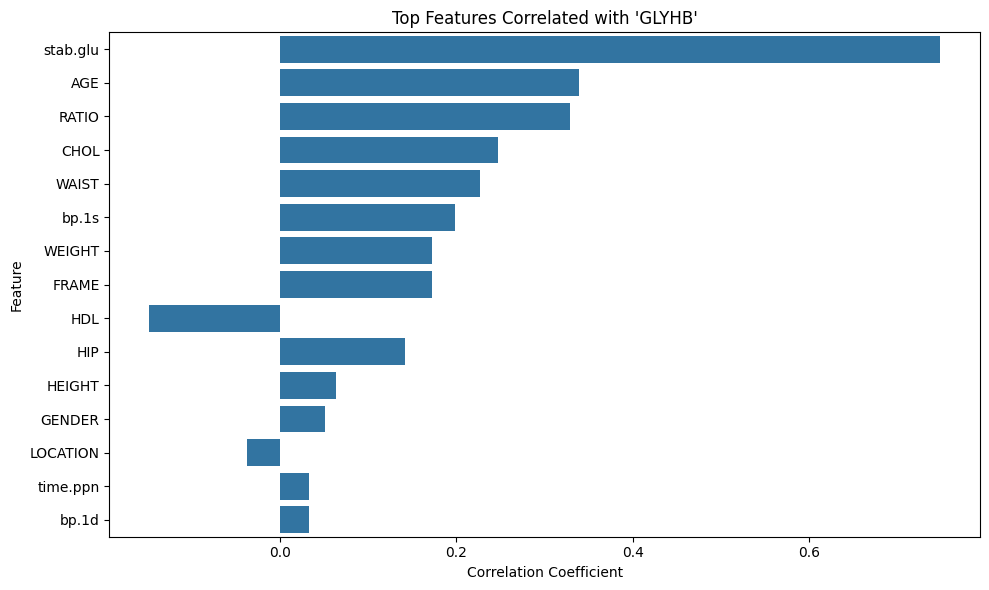

In [37]:

df_numeric = df.select_dtypes(include='number')  # or filter manually
df_numeric = df_numeric.drop(columns=['AGE_GROUP','BMI'])
df_corr = df_numeric.corr()

# Target feature to correlate with
target = 'GLYHB'  # or 'diabetes' if binary label exists

# Get correlations with the target
target_corr = df_corr[target].drop(target)  # exclude self-correlation

# Sort by absolute correlation value
top_corr = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title(f"Top Features Correlated with '{target}'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


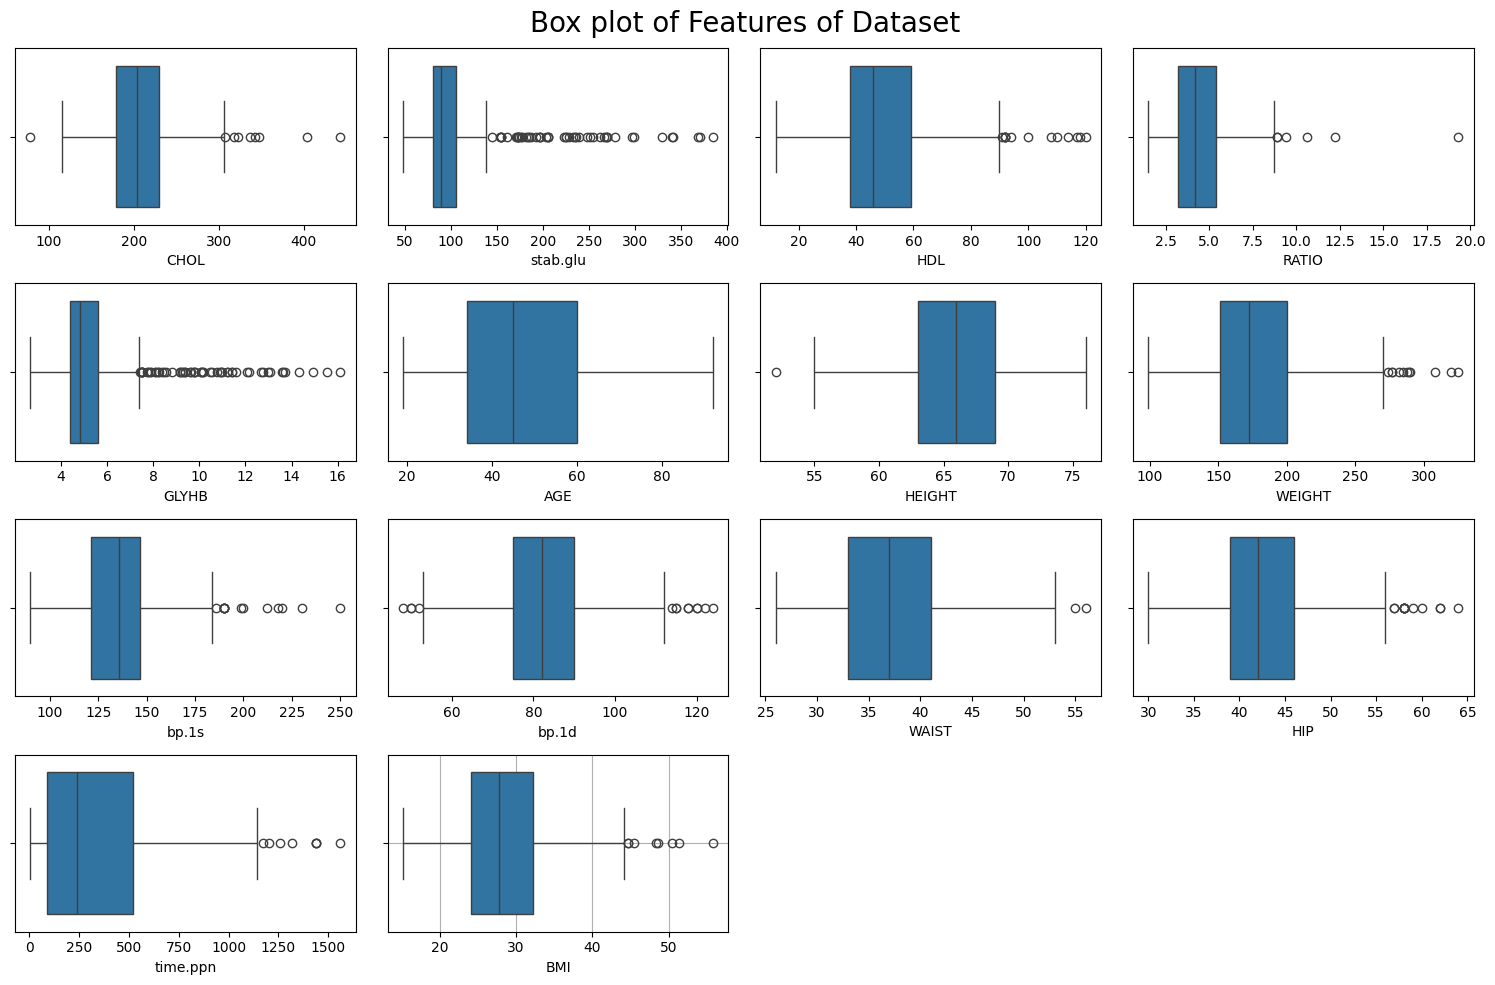

In [38]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop(['LOCATION','GENDER','FRAME','AGE_GROUP'])

Row, Col = 4, 4
fig, axes = plt.subplots(Row, Col, figsize=(15, 10))
plt.suptitle("Box plot of Features of Dataset", fontsize=20)

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])

for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.grid()
plt.show()

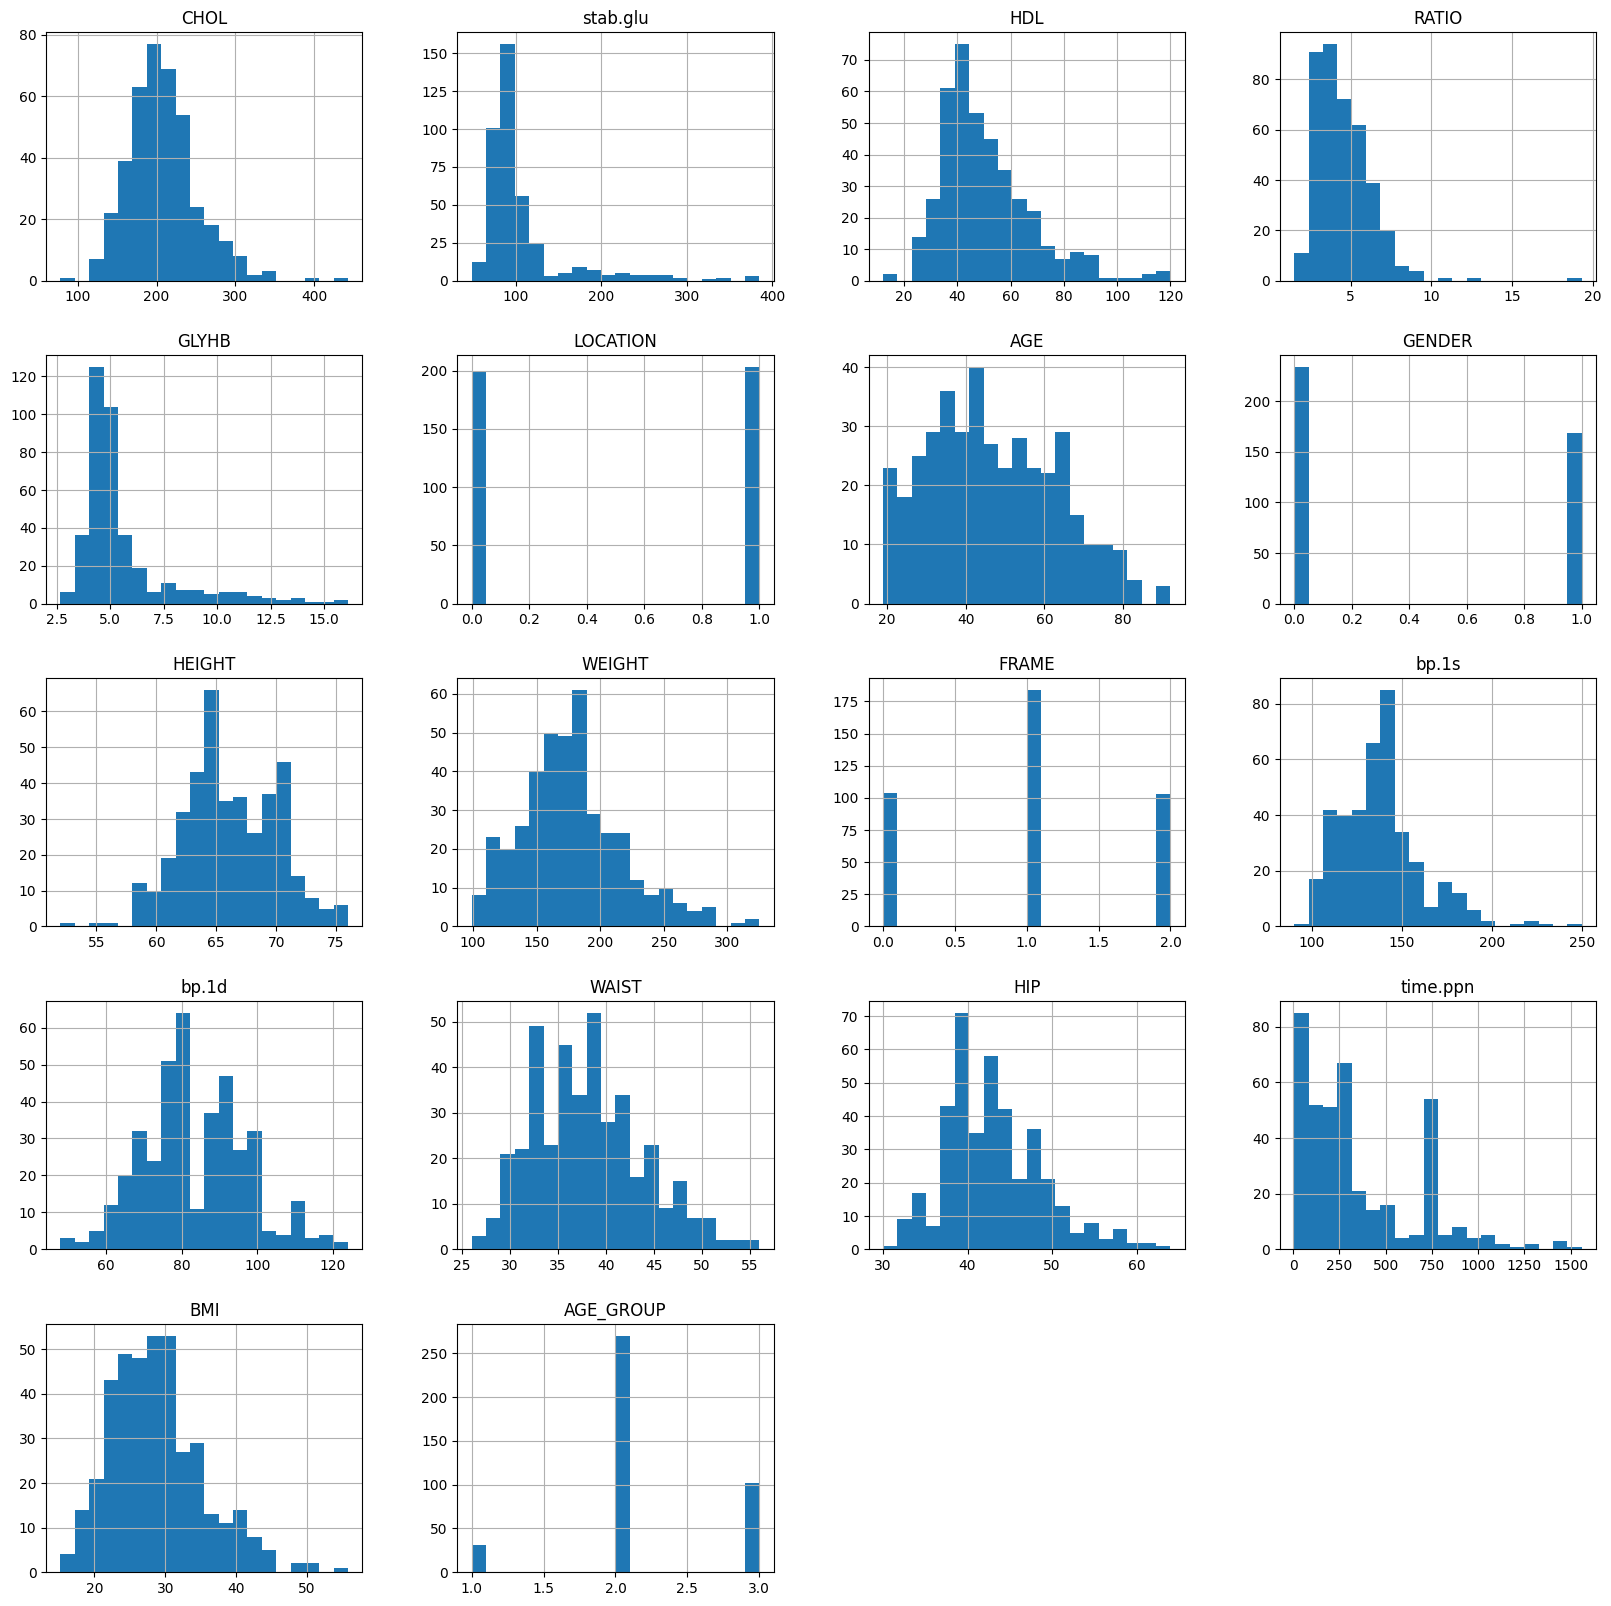

In [39]:
df.hist(bins=20,figsize=(20, 20))
plt.grid(axis = "x", alpha = 0.8)

plt.show()

# **Notice:**

The majority of the graphs indicate that the features are either normally distributed or exhibit right skewness (positive skew). A normal distribution suggests a balanced spread of data around the mean, which is ideal for many statistical analyses and machine learning models. However, right-skewed distributions indicate that there are a greater number of lower values, with a long tail extending to the higher end of the range. This skewness may impact model performance and could require transformations, such as log scaling, to improve the symmetry of the distribution and reduce the influence of outliers.

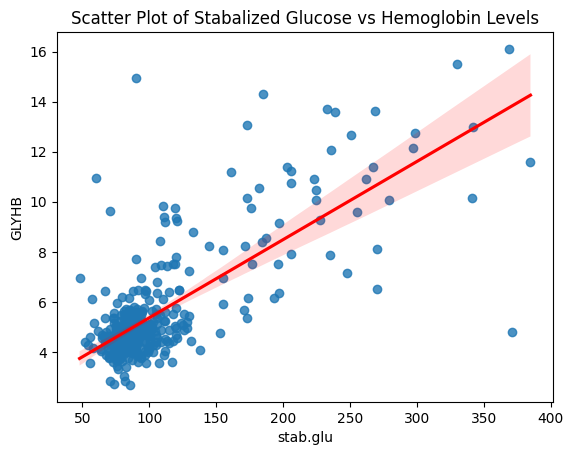

In [40]:
sns.regplot(x='stab.glu', y='GLYHB', data=df, line_kws={'color': 'red'})
plt.title('Scatter Plot of Stabalized Glucose vs Hemoglobin Levels')
plt.xlabel('stab.glu')
plt.ylabel('GLYHB')
plt.show()



# **Observation:**

As you can see, a notable positive correlation is observed between stabilized glucose levels and hemoglobin A1c (glyhb), indicating that glucose regulation may play a significant role in predicting diabetes status. This makes stabilized glucose a potentially valuable feature in classifier models for diabetes detection.

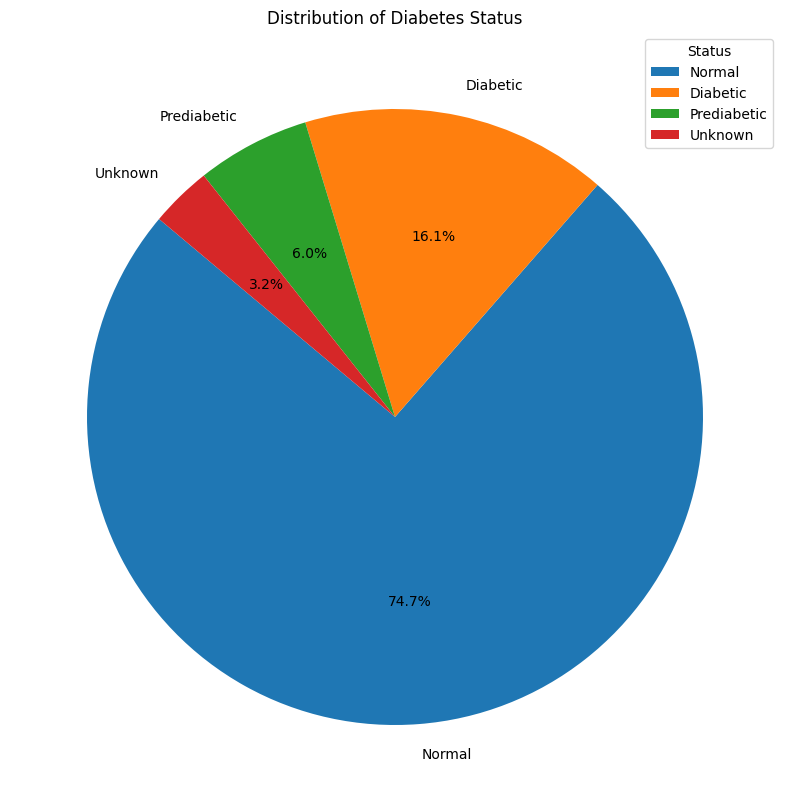

In [41]:
def categorize(row):
  if row['GLYHB'] < 5.7 or row['GLYHB'] < 5.7 and row['stab.glu'] < 100:
    return "Normal"
  elif 6.5 >= row['GLYHB'] >= 5.7 or ( 6.5 >= row['GLYHB'] >= 5.7 and 100 <=row['stab.glu'] <= 125):
    return "Prediabetic"
  elif row['GLYHB'] >= 6.5:
    return "Diabetic"
  else:
    return "Unknown"



df['status'] = df.apply(categorize, axis=1)

counts = df['status'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)

plt.legend(labels=counts.index, title='Status')
plt.title('Distribution of Diabetes Status')
plt.show()


# **Observation:**

The majority of patients in the dataset are not diabetic. Therefore, it is important to ensure that our machine learning model is particularly effective at correctly identifying diabetic individuals, despite the class imbalance. Special attention should be given to improving recall for the diabetic class to reduce the risk of false negatives.



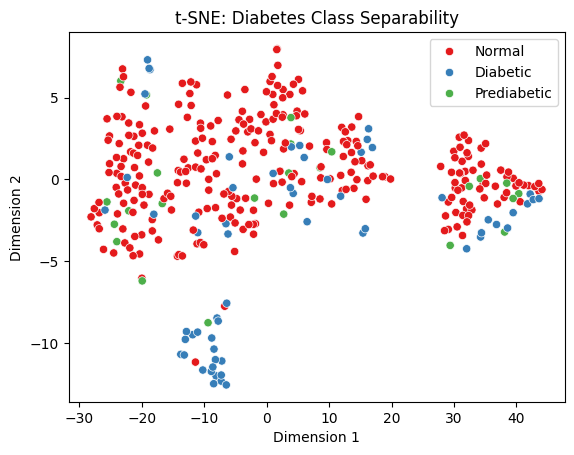

In [42]:
#Filter out the unknown class
df = df.dropna()

features = df.select_dtypes(include='number').drop(columns=['status_num'], errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

status_colors = df['status'].map({'Normal': 'blue', 'Prediabetic': 'orange', 'Diabetic': 'red'})

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df.drop(['status'], axis=1))


sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['status'], palette='Set1')
plt.title("t-SNE: Diabetes Class Separability")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


# **Observation:**

As you can see the clusters are very distibguishable for the normal  and the diabetic patients. However, the prediabetic ones are harder to calculate. This makes sense since they are such a minute difference between diabetic and prediabetics.

# **Machine Learning**

In [46]:

# Encode categorical columns
LE = LabelEncoder()
df['GENDER'] = LE.fit_transform(df['GENDER'])
df['FRAME'] = LE.fit_transform(df['FRAME'])
df['LOCATION'] = LE.fit_transform(df['LOCATION'])
df['status'] = LE.fit_transform(df['status'])

# Split data
X = df.drop(columns=["status"])
y = df["status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define pipelines
pipeline_log = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', random_state=42))
])

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())
])

pipelines = [pipeline_log, pipeline_svm, pipeline_rf, pipeline_knn, pipeline_nb, pipeline_dt]

# Evaluate each pipeline
for pipe in pipelines:
    model_name = pipe.named_steps['model'].__class__.__name__
    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)

    print(f"{model_name} Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, predictions, zero_division=True)}")
    print(f"{model_name} Confusion Matrix:\n{confusion_matrix(y_test, predictions)}")

    cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f}\n{'-'*60}")

LogisticRegression Accuracy: 0.9324
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       1.00      0.96      0.98        57
           2       0.50      0.80      0.62         5

    accuracy                           0.93        74
   macro avg       0.80      0.87      0.82        74
weighted avg       0.95      0.93      0.94        74

LogisticRegression Confusion Matrix:
[[10  0  2]
 [ 0 55  2]
 [ 1  0  4]]
LogisticRegression Cross-Validation Accuracy: 0.9235
------------------------------------------------------------
SVC Accuracy: 0.8919
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.89      1.00      0.94        57
           2       1.00      0.00      0.00         5

    accuracy                           0.89        74
   macro avg       0.93      0.58

# **Observation**



# **Hyperparameter Tuning**

In [44]:
param_rf_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10,],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
    }

param_log_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],


    }

param_svm_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__kernel': ['linear', 'rbf', 'poly']
}

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]  }

param_grid_dt = {
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2',None]
}

param_grid_nb = {}

grids = {
    'Random Forest': (pipeline_rf, param_rf_grid),
    'Logistic Regression': (pipeline_log, param_log_grid),
    'SVM': (pipeline_svm, param_svm_grid),
    'KNN': (pipeline_knn, param_grid_knn),
    'Naive Bayes': (pipeline_nb, param_grid_nb),
    'Decision Tree': (pipeline_dt, param_grid_dt)
}


for model_name, (pipeline, param_grid) in grids.items():
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Accuracy: {accuracy_score(y_test, predictions)}")

Random Forest Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Random Forest Accuracy: 0.9459459459459459
Logistic Regression Best Parameters: {'model__C': 100}
Logistic Regression Accuracy: 0.9324324324324325
SVM Best Parameters: {'model__C': 10, 'model__kernel': 'linear'}
SVM Accuracy: 0.9459459459459459
KNN Best Parameters: {'model__n_neighbors': 9, 'model__p': 2, 'model__weights': 'uniform'}
KNN Accuracy: 0.8378378378378378
Naive Bayes Best Parameters: {}
Naive Bayes Accuracy: 0.918918918918919
Decision Tree Best Parameters: {'model__max_depth': None, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Decision Tree Accuracy: 0.972972972972973


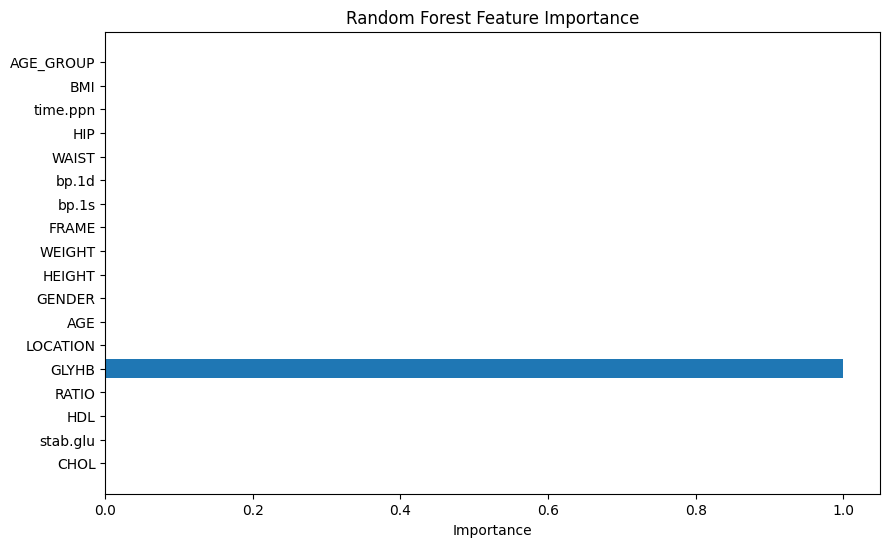

Top 10 Most Important Features:
GLYHB: 1.0
AGE_GROUP: 0.0
BMI: 0.0
time.ppn: 0.0
WAIST: 0.0
HIP: 0.0
bp.1s: 0.0
FRAME: 0.0
WEIGHT: 0.0
bp.1d: 0.0


In [48]:

dt = pipeline_dt.named_steps['model']
importances = dt.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

top_features = features[importances.argsort()[-10:][::-1]]
top_importances = importances[importances.argsort()[-10:][::-1]]
print("Top 10 Most Important Features:")
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

# **Observation:**

Although the decision tree model has the highest accuracy, notice that it only use the hemoglobin levels to determine if someone is diabetic or not. Note that it has an accuracy of 97.29% and a recall score for class 2 of 80%. If we look the logistic regression model, we can see that it has the same recall score for class 2(diabetic) with a slightly lower accuracy 93.24%. Since a logistic regression model is more robust and will equally weigh the features. Thus the logistic model will generalize better and will likely perform better with new data.

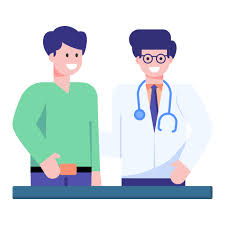

# **Conclusion:**
Our analysis and modeling efforts have highlighted key trends in the dataset and revealed meaningful insights into predicting diabetes status among patients.

- **Feature Relevance**
We observed a strong positive correlation between stabilized glucose (stab.glu) and hemoglobin levels (glyhb), suggesting these biomarkers are crucial indicators of diabetic status. Other features like blood pressure and BMI showed less predictive strength, aligning with expectations based on medical literature.

- **Class Imbalance Challenge**
The dataset is heavily imbalanced, with a majority of samples belonging to the non-diabetic class. This posed a challenge for traditional classifiers, which often favored the dominant class. To address this, we used class balancing techniques (e.g., class_weight='balanced' in Logistic Regression) and evaluated models with a focus on recall for the diabetic class — prioritizing minimizing false negatives over raw accuracy.

- **Model Comparison**
Among the models tested:

 - A Decision Tree using a single dominant feature achieved very high accuracy and recall (≈0.80) for diabetic detection. However, the simplicity of the decision path suggests it may be overfitting or relying too heavily on one feature.

 -  Logistic Regression achieved a slightly lower accuracy but comparable recall, making it a more robust and interpretable choice, especially in healthcare, where transparency matters.

 - Ensemble models like Random Forests showed excellent performance but must be evaluated carefully to avoid overfitting, particularly on small or biased datasets.

- **Cluster Separability**
Through t-SNE and PCA visualizations, we found that diabetic and non-diabetic patients are relatively well-separated, whereas pre-diabetics form a more ambiguous cluster, overlapping with both other classes. This reflects the clinical challenge of identifying pre-diabetes, where the biological markers fall into a gray area.